<a href="https://colab.research.google.com/github/quangcrazymen/CS114.M11/blob/main/LabExercise/Lab_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="color:blue;" align="center">CS114 - MACHINE LEARNING</h1>
<h1 align="center">BÀI TẬP LAB 2</h1>

# **Nội dung**

##### *Chạy thử code mẫu trong thư viên Scikit-learn và chỉnh sửa lại model*

<p>Link: <a>https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py</a></p>

Datasets

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2  #openCV
import matplotlib.pyplot as plt
from PIL import Image, ImageOps #pillow

from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

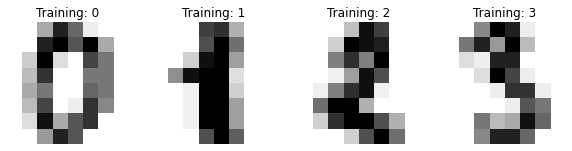

In [66]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):  #https://www.w3schools.com/python/ref_func_zip.asp
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

##### Nomalize all the values in range of [0,1]

In [67]:
# Chuyển giá trị các điểm ảnh về trong khoảng [0, 1]

# Dùng np.max() để tìm giá trị điểm ảnh lớn nhất trong ảnh để đảm bảo các giá trị trả về trong khoảng [0, 1]
for x in digits.images:
   x /= np.max(x)

# Kiểm tra lại bộ dữ liệu xem đã được chỉnh sửa hay chưa
for i in range(3):
  print("=> Image", i + 1, ": ")
  print("- Matrix:", digits.images[i])

=> Image 1 : 
- Matrix: [[0.         0.         0.33333333 0.86666667 0.6        0.06666667
  0.         0.        ]
 [0.         0.         0.86666667 1.         0.66666667 1.
  0.33333333 0.        ]
 [0.         0.2        1.         0.13333333 0.         0.73333333
  0.53333333 0.        ]
 [0.         0.26666667 0.8        0.         0.         0.53333333
  0.53333333 0.        ]
 [0.         0.33333333 0.53333333 0.         0.         0.6
  0.53333333 0.        ]
 [0.         0.26666667 0.73333333 0.         0.06666667 0.8
  0.46666667 0.        ]
 [0.         0.13333333 0.93333333 0.33333333 0.66666667 0.8
  0.         0.        ]
 [0.         0.         0.4        0.86666667 0.66666667 0.
  0.         0.        ]]
=> Image 2 : 
- Matrix: [[0.     0.     0.     0.75   0.8125 0.3125 0.     0.    ]
 [0.     0.     0.     0.6875 1.     0.5625 0.     0.    ]
 [0.     0.     0.1875 0.9375 1.     0.375  0.     0.    ]
 [0.     0.4375 0.9375 1.     1.     0.125  0.     0.    ]
 [0.    

In [68]:
# flatten the images
n_samples = len(digits.images)

data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(C = 10, gamma = 0.1, kernel = 'rbf')

# Split data into 80% train and 20% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

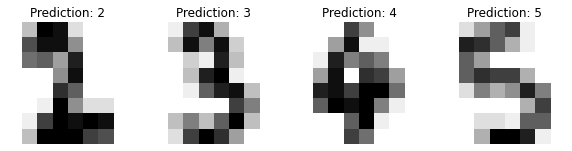

In [69]:
# Xuất các ảnh có các giá trị đã predict để tự so sánh
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [70]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(C=10, gamma=0.1):
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.95      1.00      0.97        36
           2       1.00      1.00      1.00        35
           3       1.00      0.86      0.93        37
           4       0.97      0.92      0.94        37
           5       0.93      1.00      0.96        37
           6       1.00      1.00      1.00        37
           7       0.95      1.00      0.97        36
           8       0.88      0.91      0.90        33
           9       0.92      0.92      0.92        37

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360




Confusion matrix

Confusion matrix:
[[34  0  0  0  1  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  2  0  0  3  0]
 [ 0  0  0  0 34  0  0  0  0  3]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  2  0  0  0  0  0  1 30  0]
 [ 0  0  0  0  0  1  0  1  1 34]]


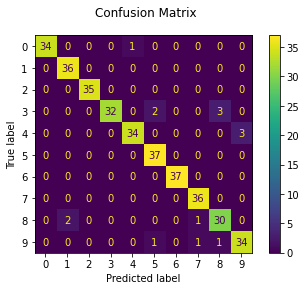

In [71]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

##### *Dùng Camera*

In [72]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


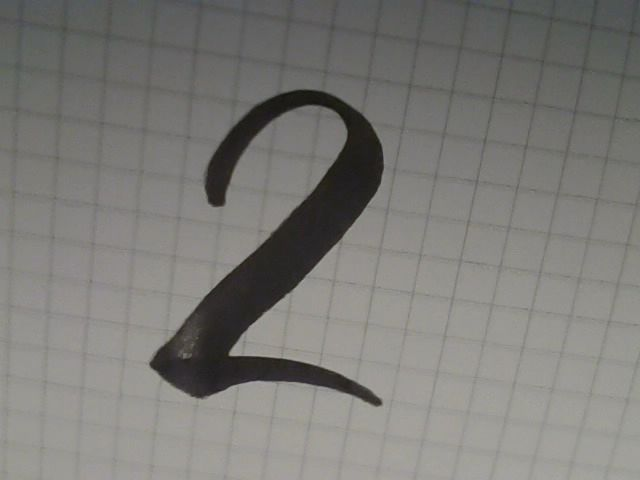

In [64]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

##### Xử lí ảnh, dự đoán và hiển thị

In [42]:
# Hàm chuyển ảnh về chữ đen, nền trắng
def getBlackTextWhiteBackground(input, output):
    # Đọc ảnh với thư viện OpenCV và chuyển về ảnh mức xám (GrayScale)
    image = cv2.imread(input, cv2.IMREAD_GRAYSCALE)
    # Làm mịn hình ảnh với cv2.GaussianBlur
    image_blur = cv2.GaussianBlur(image, (5, 5), 0)
    # Chuyển ảnh về chữ đen, nền trắng theo ngưỡng của phương thức Ostu
    ret, ostu_thresh = cv2.threshold(image_blur, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # Lưu ảnh chữ trắng, nền đen
    cv2.imwrite(output, ostu_thresh)
    # Trả về tên file ảnh chữ đen, nền trắng
    return output

# Hàm chuyển ảnh từ 'chữ đen, nền trắng' sang 'chữ trắng, nền đen' để đúng định dạng cho quá trình dự đoán
def convertWhiteTextBlackBackgroundImage(input, output):
    # Đọc ảnh với thư viện PIL
    image = Image.open(input)
    # Dùng ImageOps.invert để chuyển đổi 'chữ đen, nền trắng' sang 'chữ trắng, nền đen'
    image_result = ImageOps.invert(image)
    # Lưu ảnh đã invert
    image_result.save(output)
    # Trả về tên file ảnh 'chữ trắng, nền đen'
    return output

# Hàm cropping ảnh bỏ phần thừa
def cropImage(input, output):
    # Đọc ảnh với thư viện OpenCV
    img = cv2.imread(input)
    # Chuyển ảnh từ BRG về GRAY
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # Dùng threshold để làm ảnh thành đen trắng
    ret, thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    # Dùng findContours để tìm các vùng
    contours, hierarchy = cv2.findContours(thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
    # Tìm contour lớn nhất rồi crop ảnh
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
    biggest_contour = max(contour_sizes, key=lambda x: x[0])[1]
    x,y,w,h = cv2.boundingRect(biggest_contour)
    if (w<h):
        x -= int((h-w)/2)
        w = h
    elif (w>h):
        y -= int((w-h)/2)
        h = w
    if x<0 or y<0:
        x,y,w,h = cv2.boundingRect(biggest_contour)
    img_ = cv2.rectangle(gray,(x,y),(x+w,y+h),(0,255,0),0)
    crop = img_[y:y+h, x:x+w]
    # Lưu ảnh vào output
    cv2.imwrite(output, crop)
    # Trả về tên file output
    return output

# Hàm thay đổi kích thước ảnh sang 8x8
def resizeImage(input, output):
    # Đọc ảnh với thư viện OpenCV và chuyển về ảnh mức xám
    image = cv2.imread(input, cv2.IMREAD_GRAYSCALE)
    # Resize ảnh (Mục 4.1, STT: 7)
    image_8_8 = cv2.resize(image, (8, 8), interpolation = cv2.INTER_AREA)
    # Lưu ảnh 8x8
    cv2.imwrite(output, image_8_8)
    # Trả về tên file ảnh 8x8
    return output

# Hàm trả về kết quả predict được từ ảnh 8x8
def getResult(input):
    # Đọc ảnh với thư viện OpenCV và chuyển về ảnh mức xám
    image = cv2.imread(input, cv2.IMREAD_GRAYSCALE)
    # Chuyển các giá trị ảnh 8x8 về trong khoảng [0, 1]
    image = image / np.max(image)
    # Định hình lại ma trận từ (8, 8) sang (1, 64) để mô hình predict được
    image_predict = image.reshape(1, 64)
    #Trả về kết quả đã predict được
    return clf.predict(image_predict)[0]

# Hàm hiển thị 3 ảnh bằng pyplot (Nguồn: Mục 4.1, STT: 8)
def show3Images(img_1, title_1, img_2, title_2, img_3, title_3):
    image_1 = cv2.imread(img_1)
    image_2 = cv2.imread(img_2)
    image_3 = cv2.imread(img_3)
    plt.figure(figsize=(12, 12))
    plt.subplot(1, 3, 1)
    plt.imshow(image_1, cmap=plt.cm.gray_r)
    plt.title(title_1)
    plt.subplot(1, 3, 2)
    plt.imshow(image_2, cmap=plt.cm.gray_r)
    plt.title(title_2)
    plt.subplot(1, 3, 3)
    plt.imshow(image_3, cmap=plt.cm.gray_r)
    plt.title(title_3)
    plt.show()


Xử lí ảnh

In [43]:
# Các tên file ảnh tạm dùng để xử lí
image_crop = "temp_c.jpg"
image_text_black_background_white = "temp_b.jpg"
image_text_white_background_black = "temp_w.jpg"
image_8_8 = "temp_8x8.jpg"

# Crop -> Process -> Resize -> Predict
def getResultCropImageInTestFolder(image_original, trueValue):
  # flag is the result of the prediction, Initialize as false
  flag = False
  # Crop the original image
  cropImage(image_original, image_crop)
  # Process the image to produce new image with BLACK text,and WHITE background
  getBlackTextWhiteBackground(image_crop, image_text_black_background_white)
  # Process the image to produce new image with WHITE text,and BLACK background to fit the format of the model
  convertWhiteTextBlackBackgroundImage(image_text_black_background_white, image_text_white_background_black)
  # Resize the image to (8,8)
  resizeImage(image_text_white_background_black, image_8_8)
  # Get the result
  result = getResult(image_8_8)
  # Hiến thị ảnh: gốc, chữ trắng, 8x8 và kết quả
  show3Images(image_original, "Original",
              image_text_black_background_white, "Text: Black; Background: White",
              image_8_8, "Prediction:" + str(result))
  # Check if the predicted value = true value
  if str(result) == str(trueValue):
    flag = True
  #Xóa các file ảnh tạm
  os.remove(image_text_black_background_white)
  os.remove(image_text_white_background_black)
  os.remove(image_8_8)
  # Trả về giá trị dự đoán và kiểm tra
  return result, flag

In [53]:
import PIL.Image

In [56]:
from PIL import Image

In [59]:
def getResultCropProcessResize(image_original):
    cropImage(image_original, image_crop)
    getBlackWhiteImage(image_crop, image_text_black_background_white)
    convertWhiteBlackImage(image_text_black_background_white, image_text_white_background_black)
    resizeImage(image_text_white_background_black, image_8_8)
    result = getResult(image_8_8)
    show4Images(image_original, "Original",
                image_crop, "Dropped",
                image_text_white_background_black, "Text: White; Background: Black", 
                image_8_8, "Prediction:" + str(result))
    os.remove(image_crop)
    os.remove(image_text_black_background_white)
    os.remove(image_text_white_background_black)
    os.remove(image_8_8)
def getBlackWhiteImage(input, output):
  image = cv2.imread(input, cv2.IMREAD_GRAYSCALE)
  image_blur = cv2.GaussianBlur(image, (5, 5), 0)
  ret, ostu_thresh = cv2.threshold(image_blur, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  cv2.imwrite(output, ostu_thresh)
  return output
def convertWhiteBlackImage(input, output):
    image = Image.open(input)
    image_result = ImageOps.invert(image)
    image_result.save(output)
    return output
def cropImage(input, output):
    img = cv2.imread(input)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    contours, hierarchy = cv2.findContours(thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
    biggest_contour = max(contour_sizes, key=lambda x: x[0])[1]
    x,y,w,h = cv2.boundingRect(biggest_contour)
    if (w<h):
        x -= int((h-w)/2)
        w = h
    elif (w>h):
        y -= int((w-h)/2)
        h = w
    if x<0 or y<0:
        x,y,w,h = cv2.boundingRect(biggest_contour)
    img_ = cv2.rectangle(gray,(x,y),(x+w,y+h),(0,255,0),0)
    crop = img_[y:y+h, x:x+w]
    cv2.imwrite(output, crop)
    return output
def resizeImage(input, output):
    image = cv2.imread(input, cv2.IMREAD_GRAYSCALE)
    image_8_8 = cv2.resize(image, (8, 8), interpolation = cv2.INTER_AREA)
    cv2.imwrite(output, image_8_8)
    return output  
def getResult(input):
    image = cv2.imread(input, cv2.IMREAD_GRAYSCALE)
    image = image / np.max(image)
    image_predict = image.reshape(1, 64)
    return clf.predict(image_predict)[0]  
def show3Images(img_1, title_1, img_2, title_2, img_3, title_3):
    image_1 = cv2.imread(img_1)
    image_2 = cv2.imread(img_2)
    image_3 = cv2.imread(img_3)
    plt.figure(figsize=(12, 12))
    plt.subplot(1, 3, 1)
    plt.imshow(image_1, cmap=plt.cm.gray_r)
    plt.title(title_1)
    plt.subplot(1, 3, 2)
    plt.imshow(image_2, cmap=plt.cm.gray_r)
    plt.title(title_2)
    plt.subplot(1, 3, 3)
    plt.imshow(image_3, cmap=plt.cm.gray_r)
    plt.title(title_3)
    plt.show()
def show4Images(img_1, title_1, img_2, title_2, img_3, title_3, img_4, title_4):
    image_1 = cv2.imread(img_1)
    image_2 = cv2.imread(img_2)
    image_3 = cv2.imread(img_3)
    image_4 = cv2.imread(img_4)
    plt.figure(figsize=(12, 12))
    plt.subplot(1, 4, 1)
    plt.imshow(image_1, cmap=plt.cm.gray_r)
    plt.title(title_1)
    plt.subplot(1, 4, 2)
    plt.imshow(image_2, cmap=plt.cm.gray_r)
    plt.title(title_2)
    plt.subplot(1, 4, 3)
    plt.imshow(image_3, cmap=plt.cm.gray_r)
    plt.title(title_3)
    plt.subplot(1, 4, 4)
    plt.imshow(image_4, cmap=plt.cm.gray_r)
    plt.title(title_4)
    plt.show()

Crop -> Process -> Resize -> Predict


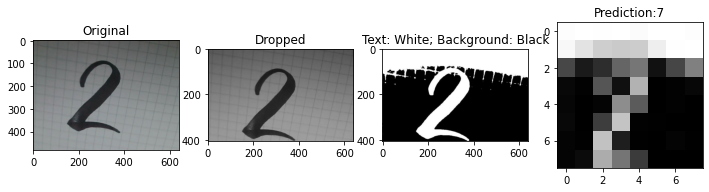

In [73]:
image_original = ('/content/photo.jpg')
print("Crop -> Process -> Resize -> Predict")
getResultCropProcessResize(image_original)

In [44]:
# folder directory
dir_test_folder = "/content/CS114.M11/LabExercise/Images/"

if not os.path.exists(dir_test_folder):
    !git clone https://github.com/quangcrazymen/CS114.M11.git

# Dùng os.listdir để lấy tất cả tên file trong thư mục
file_images = os.listdir(dir_test_folder)

# Sắp xếp lại mảng tên file
file_images.sort()

print("Number of photos:", len(file_images))
print("Path:", dir_test_folder)

Number of photos: 30
Path: /content/CS114.M11/LabExercise/Images/


Test: 0 - Images: [0][photo_0].jpg


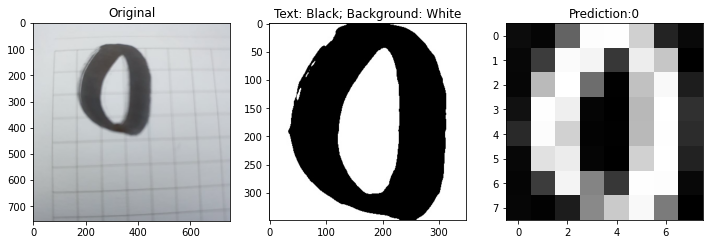

Desired result: 0 - Prediction: 0 => Check: TRUE

Test: 1 - Images: [0][photo_1].jpg


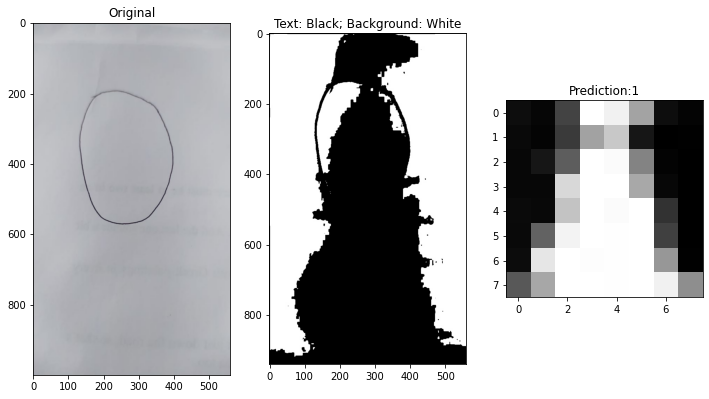

Desired result: 0 - Prediction: 1 => Check: FALSE

Test: 2 - Images: [0][photo_2].png


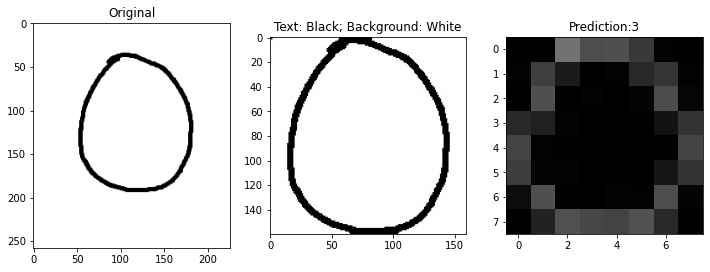

Desired result: 0 - Prediction: 3 => Check: FALSE

Test: 3 - Images: [1][photo_0].jpg


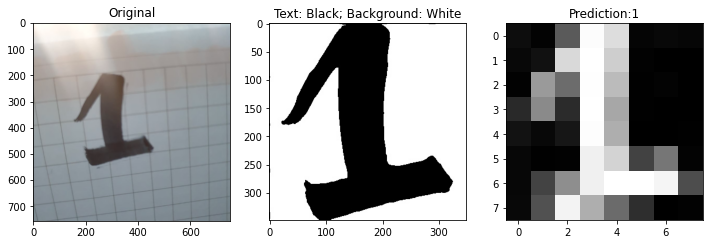

Desired result: 1 - Prediction: 1 => Check: TRUE

Test: 4 - Images: [1][photo_1].jpg


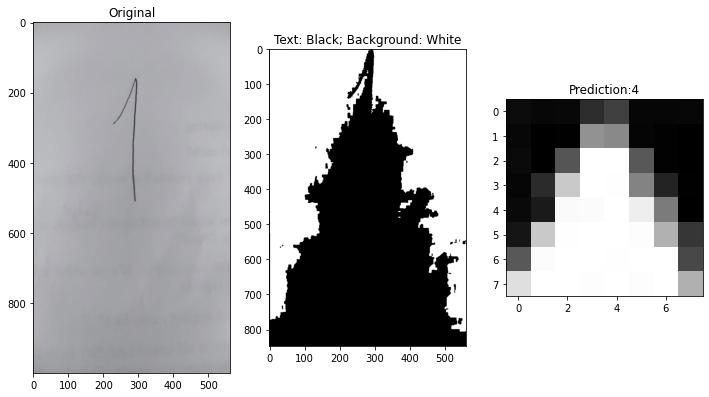

Desired result: 1 - Prediction: 4 => Check: FALSE

Test: 5 - Images: [1][photo_2].png


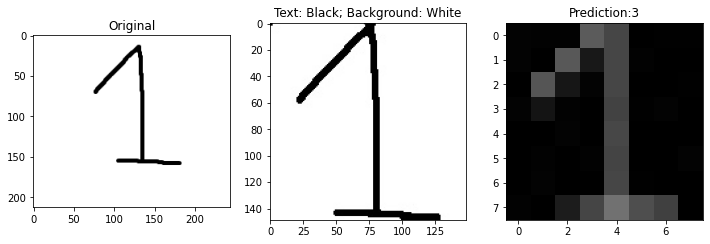

Desired result: 1 - Prediction: 3 => Check: FALSE

Test: 6 - Images: [2][photo_0].jpg


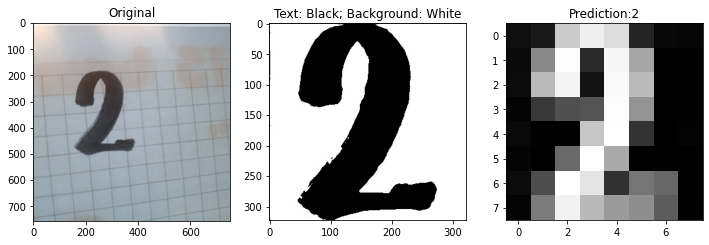

Desired result: 2 - Prediction: 2 => Check: TRUE

Test: 7 - Images: [2][photo_1].jpg


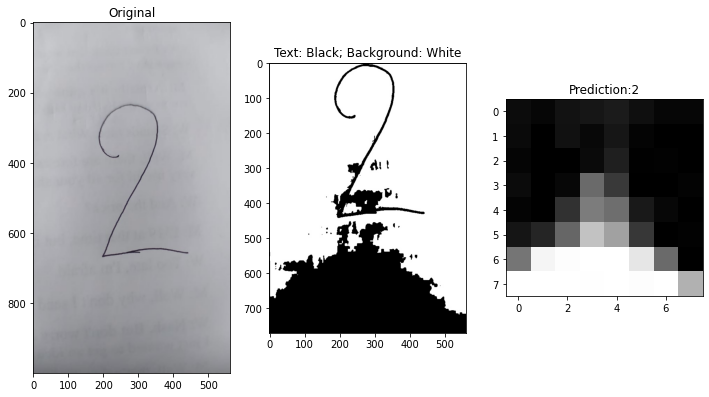

Desired result: 2 - Prediction: 2 => Check: TRUE

Test: 8 - Images: [2][photo_2].png


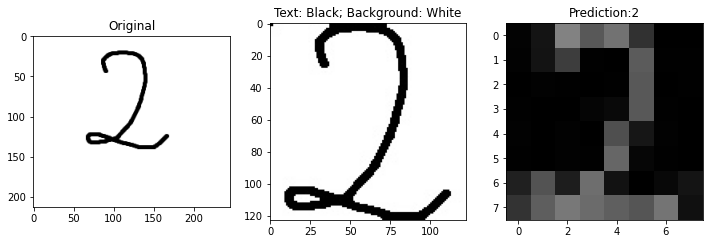

Desired result: 2 - Prediction: 2 => Check: TRUE

Test: 9 - Images: [3][photo_0].jpg


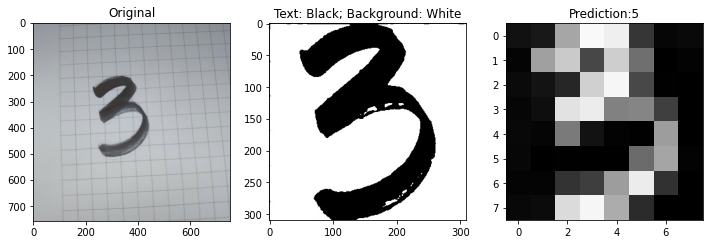

Desired result: 3 - Prediction: 5 => Check: FALSE

Test: 10 - Images: [3][photo_1].jpg


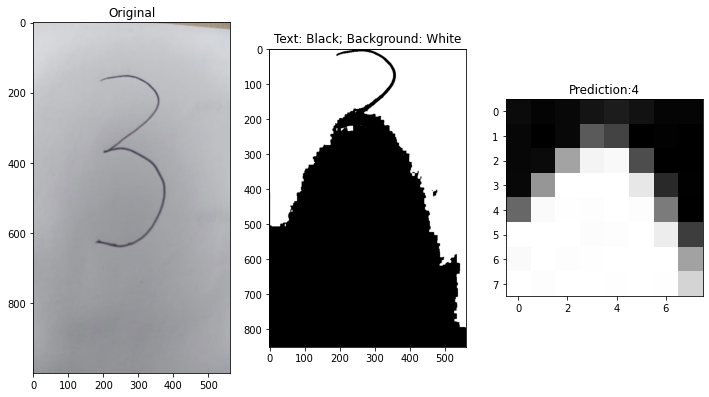

Desired result: 3 - Prediction: 4 => Check: FALSE

Test: 11 - Images: [3][photo_2].png


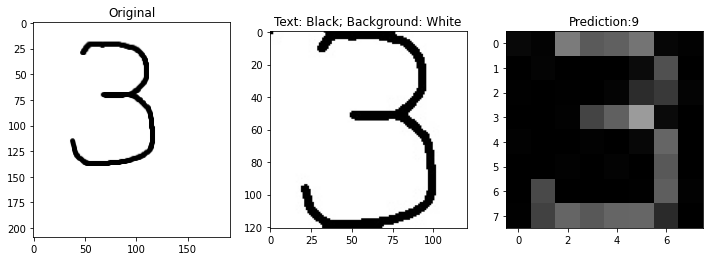

Desired result: 3 - Prediction: 9 => Check: FALSE

Test: 12 - Images: [4][photo_0].jpg


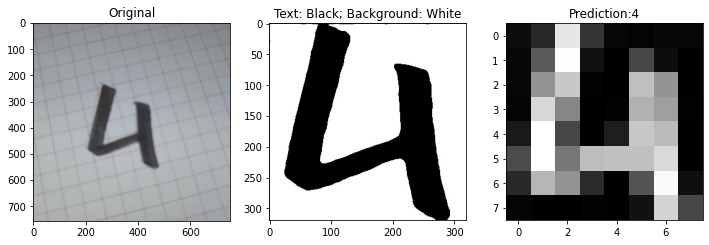

Desired result: 4 - Prediction: 4 => Check: TRUE

Test: 13 - Images: [4][photo_1].jpg


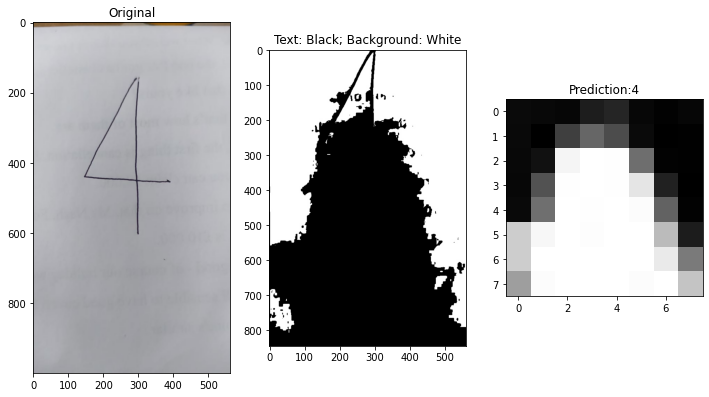

Desired result: 4 - Prediction: 4 => Check: TRUE

Test: 14 - Images: [4][photo_2].png


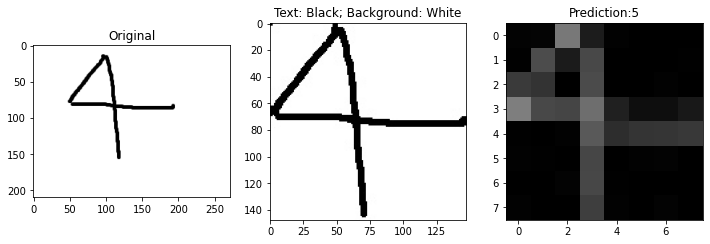

Desired result: 4 - Prediction: 5 => Check: FALSE

Test: 15 - Images: [5][photo_0].jpg


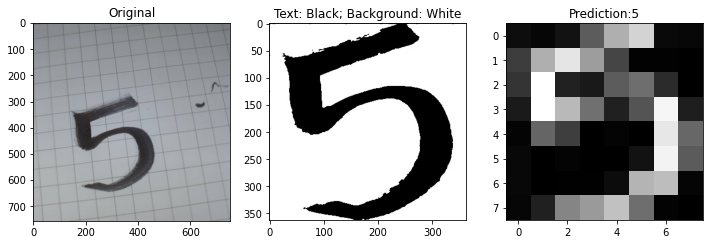

Desired result: 5 - Prediction: 5 => Check: TRUE

Test: 16 - Images: [5][photo_1].jpg


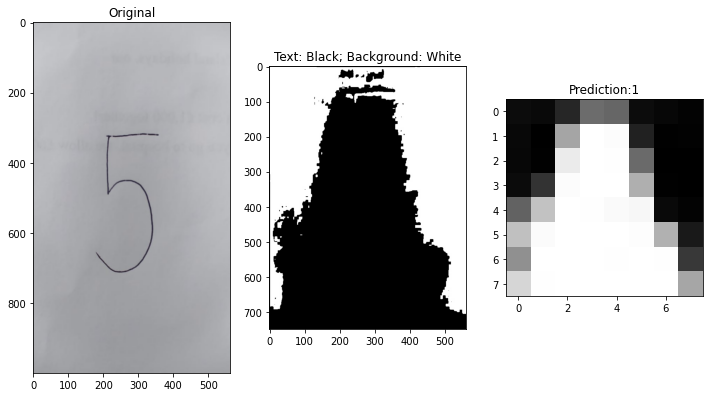

Desired result: 5 - Prediction: 1 => Check: FALSE

Test: 17 - Images: [5][photo_2].png


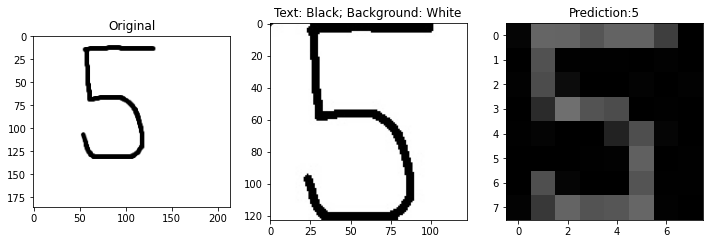

Desired result: 5 - Prediction: 5 => Check: TRUE

Test: 18 - Images: [6][photo_0].jpg


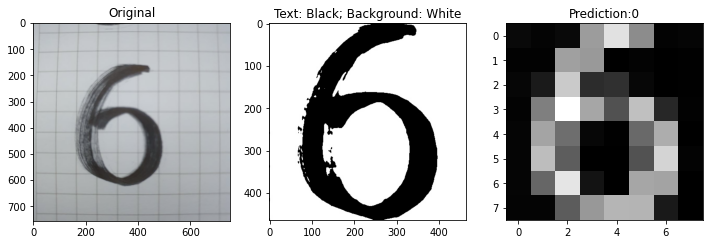

Desired result: 6 - Prediction: 0 => Check: FALSE

Test: 19 - Images: [6][photo_1].jpg


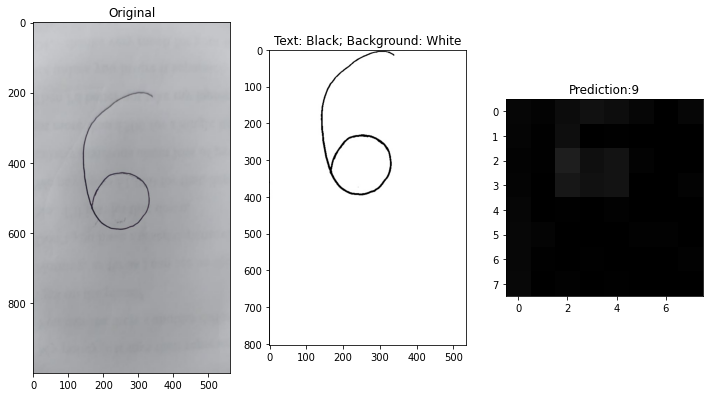

Desired result: 6 - Prediction: 9 => Check: FALSE

Test: 20 - Images: [6][photo_2].png


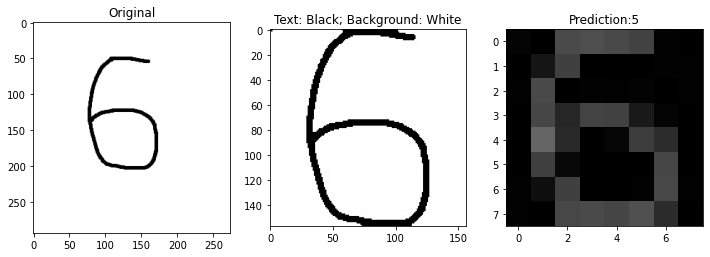

Desired result: 6 - Prediction: 5 => Check: FALSE

Test: 21 - Images: [7][photo_0].jpg


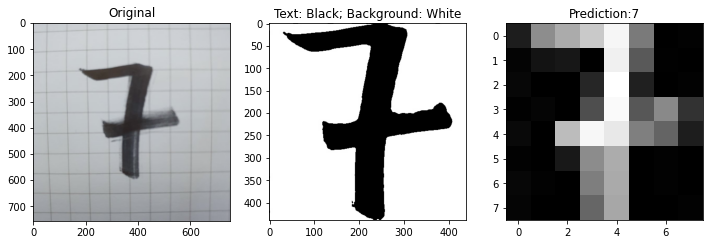

Desired result: 7 - Prediction: 7 => Check: TRUE

Test: 22 - Images: [7][photo_1].jpg


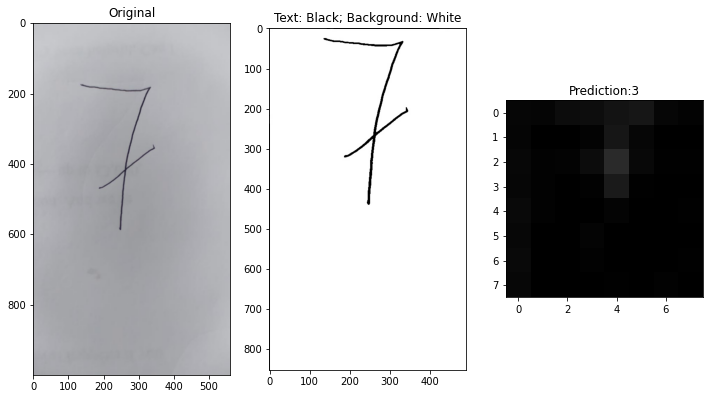

Desired result: 7 - Prediction: 3 => Check: FALSE

Test: 23 - Images: [7][photo_2].png


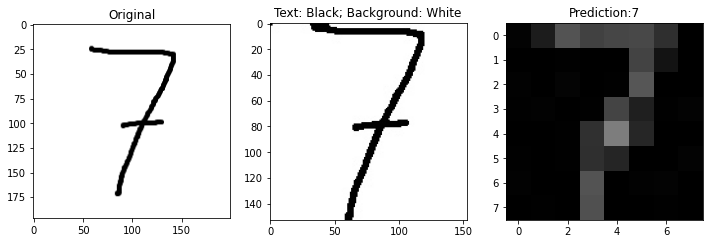

Desired result: 7 - Prediction: 7 => Check: TRUE

Test: 24 - Images: [8][photo_0].jpg


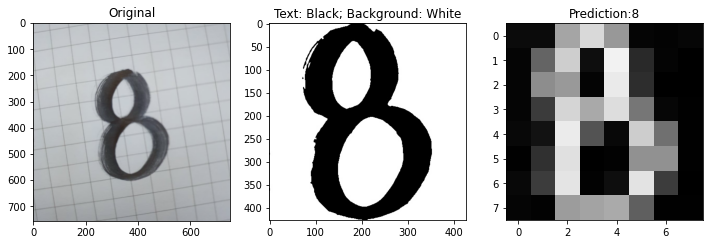

Desired result: 8 - Prediction: 8 => Check: TRUE

Test: 25 - Images: [8][photo_1].jpg


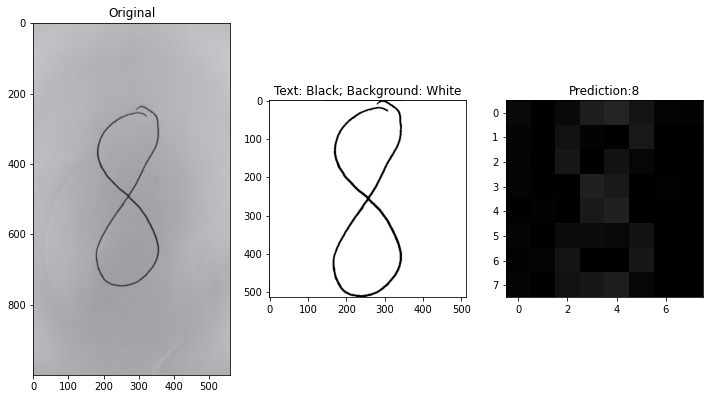

Desired result: 8 - Prediction: 8 => Check: TRUE

Test: 26 - Images: [8][photo_2].png


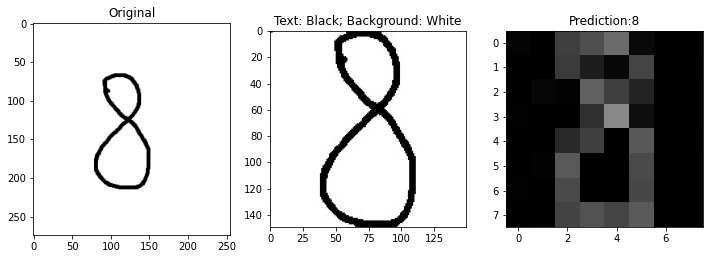

Desired result: 8 - Prediction: 8 => Check: TRUE

Test: 27 - Images: [9][photo_0].jpg


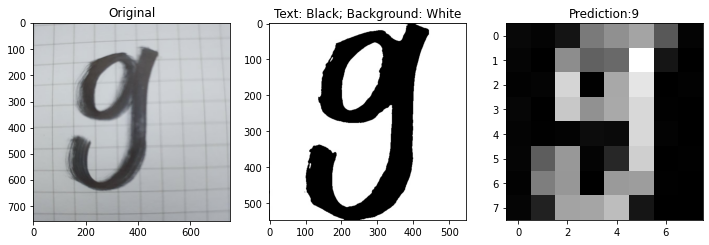

Desired result: 9 - Prediction: 9 => Check: TRUE

Test: 28 - Images: [9][photo_1].jpg


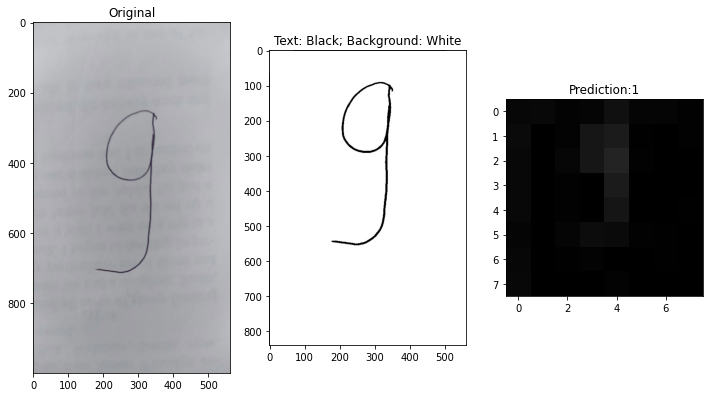

Desired result: 9 - Prediction: 1 => Check: FALSE

Test: 29 - Images: [9][photo_2].png


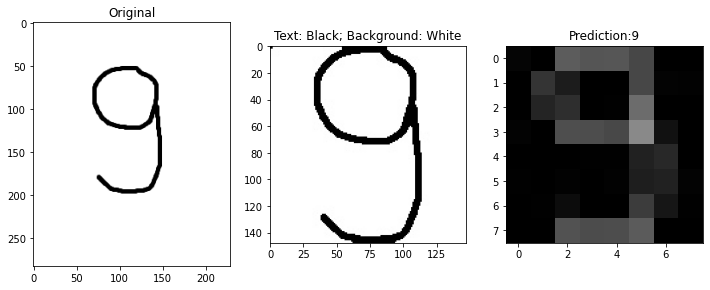

Desired result: 9 - Prediction: 9 => Check: TRUE

Total tests: 30
Correct Case(s):  16
Incorrect Case(s):  14
Accuracy: 53.33


In [45]:
# Tạo biến để tính toán độ chính xác dự đoán của mô hình
totalImage = len(file_images)
correctResult = 0

# Lặp tất cả các file trong thư mục
for i, file_image in enumerate(file_images):
    # Hiển thị thông tin test: số thứ tự và tên ảnh
    print("Test:",i,"- Images:",file_image)

    # Lấy đường dẫn đầy đủ của ảnh
    dir_file_image = dir_test_folder + file_image

    # Gọi hàm xử lí chính ảnh
    result, check = getResultCropImageInTestFolder(dir_file_image, file_image[1])

    # Nếu thấy mô hình dự đoán đúng thì tăng biến correctResult lên 1 đơn vị
    if check: correctResult += 1

    # In ra thông tin kết quả của ảnh mà mô hình dự đoán được: KQ mong muốn, KQ dự đoán, Dự đoán đúng hay không
    print("Desired result:", file_image[1],"- Prediction:", result,"=> Check:", str(check).upper())
    print("===========================================================================================\n")

# In ra thông tin tổng quát: Tổng số test, số test đúng, số test sai, độ chính xác
print("Total tests:", totalImage)
print("Correct Case(s): ",correctResult)
print("Incorrect Case(s): ", totalImage -correctResult)
accuracy = round((correctResult / totalImage) * 100, 2)
print("Accuracy: {:.2f}".format(accuracy))
print("===========================================================================================")